In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import regressor_models

In [2]:
attempts = 0
while attempts < 100:
    try:
        data_folder = input("Enter the datasets you wish to use: ")
        # if data_folder == "all":
            # make dictionary with input and output of all datasets
        inpu = sio.loadmat(f"data/{data_folder}/Train_text.mat")
        mat_input = inpu["final_output"]
        inpu_validation = sio.loadmat(f"data/{data_folder}/Test_text.mat")
        mat_input_validation = inpu_validation["final_output"]
        break
    except:
        attempts += 1
        print("Invalid file name, please choose one of the following")
        print("egemaps, emobase_feature, emobase_feature_large, text, text_large, word_embedding, all")

Enter the datasets you wish to use: emobase_feature_large


In [3]:
Actual_number_of_input = 88
number_of_features = mat_input.shape[1] - 1

# Regression data
X = mat_input[:, 0:Actual_number_of_input]
y = mat_input[:, number_of_features]

scaler = StandardScaler()
# scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

X_validation = mat_input_validation[:, 0:Actual_number_of_input]
X_validation = scaler.transform(X_validation)
validation_identifier = mat_input_validation[:, number_of_features]

In [4]:
regressor_models.linear_regressor(X, y, X_validation, validation_identifier)
regressor_models.random_forest_regressor(X, y, X_validation, validation_identifier)
regressor_models.mlp_regressor(X, y, X_validation, validation_identifier)
regressor_models.sgd_regressor(X, y, X_validation, validation_identifier)
regressor_models.gradient_boosting_regressor(X, y, X_validation, validation_identifier)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 1, loss = 292.22217124
Iteration 2, loss = 289.73481127
Iteration 3, loss = 287.29387134
Iteration 4, loss = 284.89363055
Iteration 5, loss = 282.52499536
Iteration 6, loss = 280.17633717
Iteration 7, loss = 277.83520777
Iteration 8, loss = 275.48902472
Iteration 9, loss = 273.12513004
Iteration 10, loss = 270.73092788
Iteration 11, loss = 268.29414354
Iteration 12, loss = 265.80307674
Iteration 13, loss = 263.24685451
Iteration 14, loss = 260.61563612
Iteration 15, loss = 257.90078987
Iteration 16, loss = 255.09500629
Iteration 17, loss = 252.19224313
Iteration 18, loss = 249.18753654
Iteration 19, loss = 246.07686468
Iteration 20, loss = 242.85717854
Iteration 21, loss = 239.52661905
Iteration 22, loss = 236.08486532
Iteration 23, loss = 232.53339352
Iteration 24, loss = 228.87546414
Iteration 25, loss = 225.11587630
Iteration 26, loss = 221.26071596
Iteration 27, loss = 217.31725901
Iteration 28, loss = 213.29395472
Iteration 29, loss = 209.20038634
Iteration 30, loss = 20

Iteration 269, loss = 29.19838276
Iteration 270, loss = 29.04005534
Iteration 271, loss = 28.87885894
Iteration 272, loss = 28.71297569
Iteration 273, loss = 28.54202201
Iteration 274, loss = 28.36967493
Iteration 275, loss = 28.20848652
Iteration 276, loss = 28.07437388
Iteration 277, loss = 27.95565114
Iteration 278, loss = 27.82143044
Iteration 279, loss = 27.67170171
Iteration 280, loss = 27.52593845
Iteration 281, loss = 27.38953491
Iteration 282, loss = 27.25557334
Iteration 283, loss = 27.11880129
Iteration 284, loss = 26.98193641
Iteration 285, loss = 26.84747745
Iteration 286, loss = 26.71797844
Iteration 287, loss = 26.59167792
Iteration 288, loss = 26.46727136
Iteration 289, loss = 26.34254050
Iteration 290, loss = 26.21462643
Iteration 291, loss = 26.08580109
Iteration 292, loss = 25.95864753
Iteration 293, loss = 25.83635546
Iteration 294, loss = 25.71868764
Iteration 295, loss = 25.60193307
Iteration 296, loss = 25.48403705
Iteration 297, loss = 25.36447922
Iteration 298,

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


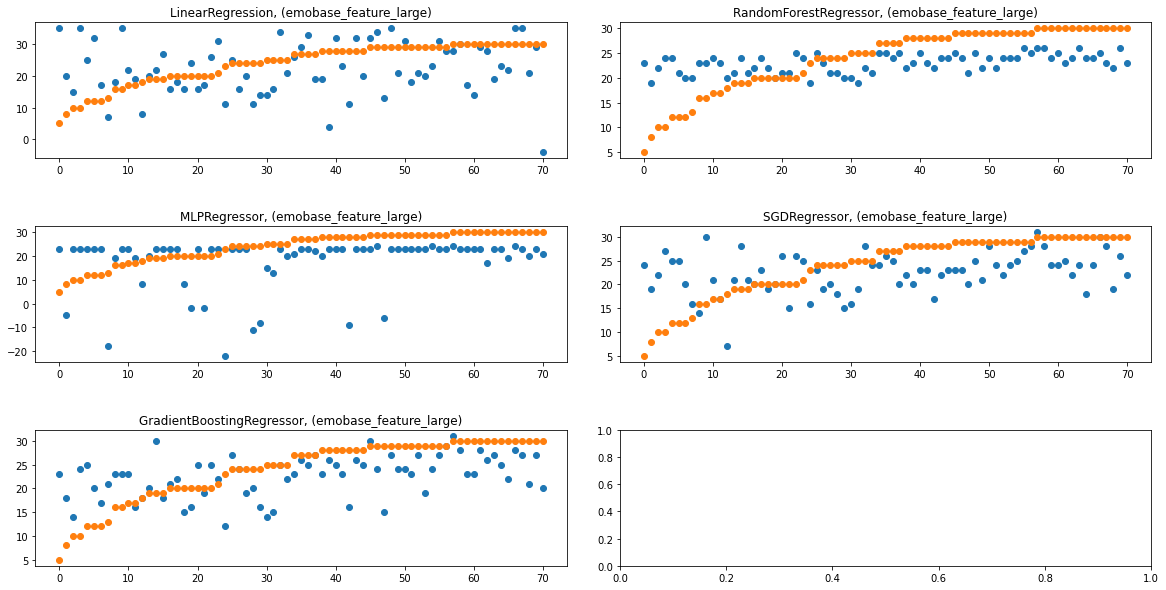

In [5]:
fig, axs = plt.subplots(3,2, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()
graph_counter = 0

for k in regressor_models.results_dict:
    prediction = regressor_models.results_dict[k]["Pred"]
    actual = regressor_models.results_dict[k]["Actual"]

    try:
        arr1inds = actual.argsort()
        actual = actual[arr1inds]
        prediction = prediction[arr1inds]
        x_coordinates = np.arange(prediction.size)
        axs[graph_counter].scatter(x_coordinates, prediction)
        axs[graph_counter].scatter(x_coordinates, actual)
        axs[graph_counter].set_title(f"{k}, ({data_folder})")
        graph_counter += 1
    except:
        print(k)
        pass